In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [3]:
#하이퍼 파라메터 정의(매개변수들)
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 #출력갯수 = 숫자의 갯수
N_HIDDEN = 128 
VALIDATION_SPLIT = 0.2 #검증을 위해 남겨둘 훈련 데이타
DROPOUT = 0.3

In [4]:
# MNIST 데이타셋 로드(MNIST는 숫자만, eMNIST는 숫자+알파벳, 패션MNIST는 옷그림들이 있다)
# X값 훈련용, 테스트 데이터를 각각 60,000개와 10,000개로 나눈다
# 레이블(정답, Y값)에 대한 원핫 인코딩을 자동으로 적용한다
# 아래 데이타셋을 .png 형태의 이미지를 이미 숫자화한 배열형태로 바꾸어 놓은 것이며, .csv형태가 분석 초기 데이타이다.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train은 60,000개 행으로 28x28 값을 가진다. 이를 60,000 x 784(28x28)의 행렬형태로 변환한다.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 입력을 [0, 1] 사이로 정규화
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'train samples')

# 레이블을 원한 엔코딩, 그래야 행렬 연산이 가능함
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 train samples


In [5]:
# 모델 구축(정의)
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_Dense_layer_1', activation='relu', kernel_regularizer='l1', activity_regularizer='l2'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN, name='hidden_Dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES, name='output_Dense_layer_3', activation='softmax'))

In [6]:
# 모델 컴파일
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
# 모델 형태 보기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Dense_layer_1 (Dense)  (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden_Dense_layer_2 (Dense) (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_Dense_layer_3 (Dense) (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 훈련
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_accuracy')

hist = model.fit(x = X_train, y = Y_train, 
          batch_size = BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[early_stopping])

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 4.7893 - accuracy: 0.7085 - val_loss: 1.1739 - val_accuracy: 0.8747
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 1.2779 - accuracy: 0.8161 - val_loss: 1.0330 - val_accuracy: 0.8968
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 1.1998 - accuracy: 0.8362 - val_loss: 1.0243 - val_accuracy: 0.9027
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 1.1718 - accuracy: 0.8457 - val_loss: 1.0123 - val_accuracy: 0.8977
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 1.1322 - accuracy: 0.8537 - val_loss: 0.9440 - val_accuracy: 0.9201
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 1.1071 - accuracy: 0.8596 - val_loss: 0.9297 - val_accuracy: 0.9184
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 1.1029 - accuracy: 0.8608 - val_loss: 0.8828 - val_accuracy: 0.9274

In [9]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test loss: ", round(test_loss,4), "Test accuracy:", round(test_acc,4))

313/313 [==============================] - 1s 2ms/step - loss: 0.7914 - accuracy: 0.9392
Test loss:  0.7914 Test accuracy: 0.9392


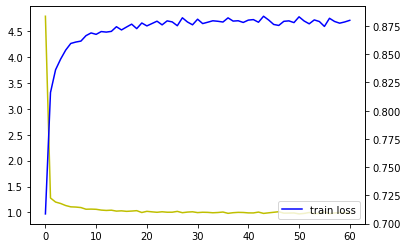

In [10]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
#acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['train loss', 'train accuracy'])
plt.show()

# 모델 저장 및 재-사용

In [12]:
# 모델 저장
import os.path
if os.path.isfile("mnist_opt_level_06_save&reuse.h5") is False:
     model.save("mnist_opt_level_06_save&reuse.h5")

In [16]:
# 저장된 모델 불러들여 학습없이 재-사용하기
from keras.models import load_model
new_model = load_model("mnist_opt_level_06_save&reuse.h5")
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Dense_layer_1 (Dense)  (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden_Dense_layer_2 (Dense) (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_Dense_layer_3 (Dense) (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
new_model.get_weights()

[array([[-1.2445191e-04, -3.0417279e-05,  2.4030014e-05, ...,
          2.9516712e-05, -1.2884769e-04, -3.3700356e-04],
        [ 4.4301793e-05, -1.2476774e-04,  6.4742737e-05, ...,
         -7.4323485e-05,  1.5532941e-04,  1.3091485e-05],
        [-1.1095025e-04, -7.4867836e-05, -1.4816731e-04, ...,
          5.5511984e-05,  5.2428513e-05, -9.2292335e-05],
        ...,
        [ 8.7534245e-05, -4.4310342e-05, -2.3290835e-05, ...,
          2.4369045e-04,  5.8788646e-07, -1.3422559e-04],
        [ 1.5449975e-04, -1.7404920e-04, -1.3240904e-04, ...,
         -9.0897360e-05,  8.6423512e-05,  7.1567250e-05],
        [ 7.8431505e-05,  1.3613777e-04,  2.0349132e-04, ...,
          2.2357822e-04, -8.9024652e-06, -1.6767671e-04]], dtype=float32),
 array([-0.02469496, -0.00825092, -0.0045532 ,  0.09217068, -0.05162613,
        -0.00837634, -0.01558309, -0.01016511,  0.02744829, -0.05259503,
        -0.02517817, -0.01123002, -0.02958232, -0.01277069,  0.02858242,
        -0.01970847, -0.0092404

In [18]:
new_model.optimizer

# json이나 yaml형태로 저장 및 불러오기

In [22]:
import json

# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [28]:
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_Dense_layer_1_input"}}, {"class_name": "Dense", "config": {"name": "input_Dense_layer_1", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1", "config": {"l1": 0.009999999776482582}}, "bias_regularizer": null, "activity_regularizer": {"class_name": "L2", "config": {"l2": 0.009999999776482582}}, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.3, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config"

In [30]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [31]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_Dense_layer_1 (Dense)  (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
hidden_Dense_layer_2 (Dense) (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output_Dense_layer_3 (Dense) (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 모델 Weight 저장 및 재-사용

In [32]:
if os.path.isfile("mnist_opt_level_06_save&reuse_weight.h5") is False:
     model.save_weights("mnist_opt_level_06_save&reuse_weight.h5")

In [33]:
model2 = tf.keras.models.Sequential()
model2.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='input_Dense_layer_1', activation='relu', kernel_regularizer='l1', activity_regularizer='l2'))
model2.add(keras.layers.Dropout(DROPOUT))
model2.add(keras.layers.Dense(N_HIDDEN, name='hidden_Dense_layer_2', activation='relu'))
model2.add(keras.layers.Dropout(DROPOUT))
model2.add(keras.layers.Dense(NB_CLASSES, name='output_Dense_layer_3', activation='softmax'))

In [34]:
model2.load_weights("mnist_opt_level_06_save&reuse_weight.h5")

In [35]:
model2.get_weights()

[array([[-1.2445191e-04, -3.0417279e-05,  2.4030014e-05, ...,
          2.9516712e-05, -1.2884769e-04, -3.3700356e-04],
        [ 4.4301793e-05, -1.2476774e-04,  6.4742737e-05, ...,
         -7.4323485e-05,  1.5532941e-04,  1.3091485e-05],
        [-1.1095025e-04, -7.4867836e-05, -1.4816731e-04, ...,
          5.5511984e-05,  5.2428513e-05, -9.2292335e-05],
        ...,
        [ 8.7534245e-05, -4.4310342e-05, -2.3290835e-05, ...,
          2.4369045e-04,  5.8788646e-07, -1.3422559e-04],
        [ 1.5449975e-04, -1.7404920e-04, -1.3240904e-04, ...,
         -9.0897360e-05,  8.6423512e-05,  7.1567250e-05],
        [ 7.8431505e-05,  1.3613777e-04,  2.0349132e-04, ...,
          2.2357822e-04, -8.9024652e-06, -1.6767671e-04]], dtype=float32),
 array([-0.02469496, -0.00825092, -0.0045532 ,  0.09217068, -0.05162613,
        -0.00837634, -0.01558309, -0.01016511,  0.02744829, -0.05259503,
        -0.02517817, -0.01123002, -0.02958232, -0.01277069,  0.02858242,
        -0.01970847, -0.0092404